In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

In [15]:
%load_ext autoreload
%autoreload 2

import pysax
import pysequitur
import pyoutlier
import numpy as np 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## test pyoutlierdetection

In [169]:
detector = pyoutlier.TSOutlierDetection(sax_params = dict(window = 100, stride = 10, nbins = 4, alphabet = "ABCD"), 
                                        sequitur_params = dict(sequitur_path="sequitur/sequitur"))
xs = np.random.randn(1000000)

In [170]:
%time symbols = detector.sax_symbolize(xs)
%time reduced_symbols, reduced_symbol_indices = detector.numerosity_reduce(symbols)
print len(symbols), len(reduced_symbols), len(indices)
%time word_occurrences = detector.grammar_induce(reduced_symbols)
%time outliers = detector.mine_infrequent_segments(word_occurrences, threshold=5)

save temp file at /tmp/tmpdK3I7k
CPU times: user 783 ms, sys: 509 ms, total: 1.29 s
Wall time: 6.29 s
CPU times: user 150 ms, sys: 0 ns, total: 150 ms
Wall time: 151 ms
99991 77942 772
CPU times: user 107 ms, sys: 20.2 ms, total: 127 ms
Wall time: 856 ms
CPU times: user 5.05 ms, sys: 0 ns, total: 5.05 ms
Wall time: 5 ms


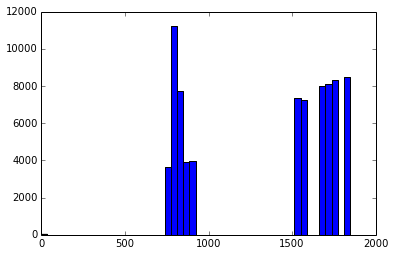

In [171]:
_ = plt.hist(word_occurrences, bins = 50)

In [172]:
[ (i, symbols[i], wc) for i,wc in zip(np.array(reduced_symbol_indices)[outliers], 
                                      np.asarray(word_occurrences)[outliers])]

[(slice(2396, 2397, None), ['CACC'], 1),
 (slice(6355, 6356, None), ['BBBD'], 0),
 (slice(10822, 10823, None), ['DBBB'], 0),
 (slice(11348, 11349, None), ['ACCC'], 0),
 (slice(12626, 12627, None), ['BCDB'], 0),
 (slice(13746, 13747, None), ['ACCB'], 0),
 (slice(14583, 14584, None), ['BBDB'], 0),
 (slice(15943, 15944, None), ['BBDB'], 0),
 (slice(29515, 29516, None), ['CBDB'], 0),
 (slice(30571, 30572, None), ['CACC'], 1),
 (slice(37697, 37698, None), ['BBBD'], 0),
 (slice(40005, 40006, None), ['CCAC'], 0),
 (slice(40010, 40011, None), ['ACCC'], 0),
 (slice(43316, 43317, None), ['CCAC'], 0),
 (slice(56158, 56159, None), ['CCCA'], 0),
 (slice(56163, 56164, None), ['CACC'], 1),
 (slice(61895, 61896, None), ['BDBB'], 0),
 (slice(64376, 64377, None), ['BBDB'], 0),
 (slice(83945, 83946, None), ['BBBD'], 0),
 (slice(83950, 83951, None), ['BDBB'], 0),
 (slice(85450, 85451, None), ['BCBD'], 0),
 (slice(86406, 86407, None), ['BBDB'], 0),
 (slice(97447, 97448, None), ['BBDB'], 0),
 (slice(97452, 